In [1]:
# importando as bibliotecas e classes
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [2]:
#Dados treinos    
dados_treinos = pd.read_csv("novodataframe.csv")

In [3]:
dados_treinos.head()

,Ano/Estados,AM - QTD QUEIMADAS,MA - QTD QUEIMADAS,AC - QTD QUEIMADAS,AP - QTD QUEIMADAS,MT - QTD QUEIMADAS,PA - QTD QUEIMADAS,RO - QTD QUEIMADAS,RR - QTD QUEIMADAS,TO - QTD QUEIMADAS,AC - Desmatamento,AM - Desmatamento,AP - Desmatamento,MA - Desmatamento,MT - Desmatamento,PA - Desmatamento,RO - Desmatamento,RR - Desmatamento,TO - Desmatamento,AMZ LEGAL - Desmatamento
0,2004,8083.0,11443.0,7271.0,3413.0,70422.0,74214.0,40824.0,2221.0,746.0,728.0,1232.0,46.0,755.0,11814.0,8870.0,3858.0,311.0,158.0,27772.0
1,2005,15644.0,10820.0,15993.0,2020.0,53489.0,71477.0,41641.0,1461.0,1175.0,592.0,775.0,33.0,922.0,7145.0,5899.0,3244.0,133.0,271.0,19014.0
2,2006,11697.0,7885.0,6198.0,1665.0,32745.0,55840.0,25699.0,2189.0,504.0,398.0,788.0,30.0,674.0,4333.0,5659.0,2049.0,231.0,124.0,14286.0
3,2007,11293.0,12329.0,8549.0,1484.0,52399.0,68491.0,27477.0,3244.0,1214.0,184.0,610.0,39.0,631.0,2678.0,5526.0,1611.0,309.0,63.0,11651.0
4,2008,6701.0,7822.0,5699.0,2153.0,18602.0,48449.0,11549.0,1950.0,528.0,254.0,604.0,100.0,1271.0,3258.0,5607.0,1136.0,574.0,107.0,12911.0


In [4]:
dados_treinos = dados_treinos.drop(["AC - Desmatamento", "AM - Desmatamento","MA - Desmatamento","MT - Desmatamento","PA - Desmatamento","RO - Desmatamento","RR - Desmatamento"], axis=1)

In [5]:
dados_treinos

,Ano/Estados,AM - QTD QUEIMADAS,MA - QTD QUEIMADAS,AC - QTD QUEIMADAS,AP - QTD QUEIMADAS,MT - QTD QUEIMADAS,PA - QTD QUEIMADAS,RO - QTD QUEIMADAS,RR - QTD QUEIMADAS,TO - QTD QUEIMADAS,AP - Desmatamento,TO - Desmatamento,AMZ LEGAL - Desmatamento
0,2004,8083.0,11443.0,7271.0,3413.0,70422.0,74214.0,40824.0,2221.0,746.0,46.0,158.0,27772.0
1,2005,15644.0,10820.0,15993.0,2020.0,53489.0,71477.0,41641.0,1461.0,1175.0,33.0,271.0,19014.0
2,2006,11697.0,7885.0,6198.0,1665.0,32745.0,55840.0,25699.0,2189.0,504.0,30.0,124.0,14286.0
3,2007,11293.0,12329.0,8549.0,1484.0,52399.0,68491.0,27477.0,3244.0,1214.0,39.0,63.0,11651.0
4,2008,6701.0,7822.0,5699.0,2153.0,18602.0,48449.0,11549.0,1950.0,528.0,100.0,107.0,12911.0
5,2009,9280.0,6664.0,3511.0,2456.0,9970.0,41664.0,5396.0,2359.0,382.0,70.0,61.0,7464.0
6,2010,12139.0,7298.0,8661.0,1000.0,28362.0,57196.0,16924.0,1918.0,1116.0,53.0,49.0,7000.0
7,2011,5028.0,4976.0,3191.0,1396.0,9103.0,26563.0,6078.0,1475.0,376.0,66.0,40.0,6418.0
8,2012,9114.0,6919.0,4720.0,2518.0,16133.0,37221.0,8312.0,1376.0,406.0,27.0,52.0,4571.0
9,2013,6512.0,4418.0,4980.0,1529.0,10830.0,24046.0,4613.0,1395.0,365.0,23.0,74.0,5891.0


In [6]:
dados_treinos = dados_treinos.drop(["AP - Desmatamento","TO - Desmatamento"], axis=1)

In [7]:
dados_treinos

,Ano/Estados,AM - QTD QUEIMADAS,MA - QTD QUEIMADAS,AC - QTD QUEIMADAS,AP - QTD QUEIMADAS,MT - QTD QUEIMADAS,PA - QTD QUEIMADAS,RO - QTD QUEIMADAS,RR - QTD QUEIMADAS,TO - QTD QUEIMADAS,AMZ LEGAL - Desmatamento
0,2004,8083.0,11443.0,7271.0,3413.0,70422.0,74214.0,40824.0,2221.0,746.0,27772.0
1,2005,15644.0,10820.0,15993.0,2020.0,53489.0,71477.0,41641.0,1461.0,1175.0,19014.0
2,2006,11697.0,7885.0,6198.0,1665.0,32745.0,55840.0,25699.0,2189.0,504.0,14286.0
3,2007,11293.0,12329.0,8549.0,1484.0,52399.0,68491.0,27477.0,3244.0,1214.0,11651.0
4,2008,6701.0,7822.0,5699.0,2153.0,18602.0,48449.0,11549.0,1950.0,528.0,12911.0
5,2009,9280.0,6664.0,3511.0,2456.0,9970.0,41664.0,5396.0,2359.0,382.0,7464.0
6,2010,12139.0,7298.0,8661.0,1000.0,28362.0,57196.0,16924.0,1918.0,1116.0,7000.0
7,2011,5028.0,4976.0,3191.0,1396.0,9103.0,26563.0,6078.0,1475.0,376.0,6418.0
8,2012,9114.0,6919.0,4720.0,2518.0,16133.0,37221.0,8312.0,1376.0,406.0,4571.0
9,2013,6512.0,4418.0,4980.0,1529.0,10830.0,24046.0,4613.0,1395.0,365.0,5891.0


In [8]:
#Verificar se tem valores em branco
dados_treinos.isna()

,Ano/Estados,AM - QTD QUEIMADAS,MA - QTD QUEIMADAS,AC - QTD QUEIMADAS,AP - QTD QUEIMADAS,MT - QTD QUEIMADAS,PA - QTD QUEIMADAS,RO - QTD QUEIMADAS,RR - QTD QUEIMADAS,TO - QTD QUEIMADAS,AMZ LEGAL - Desmatamento
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


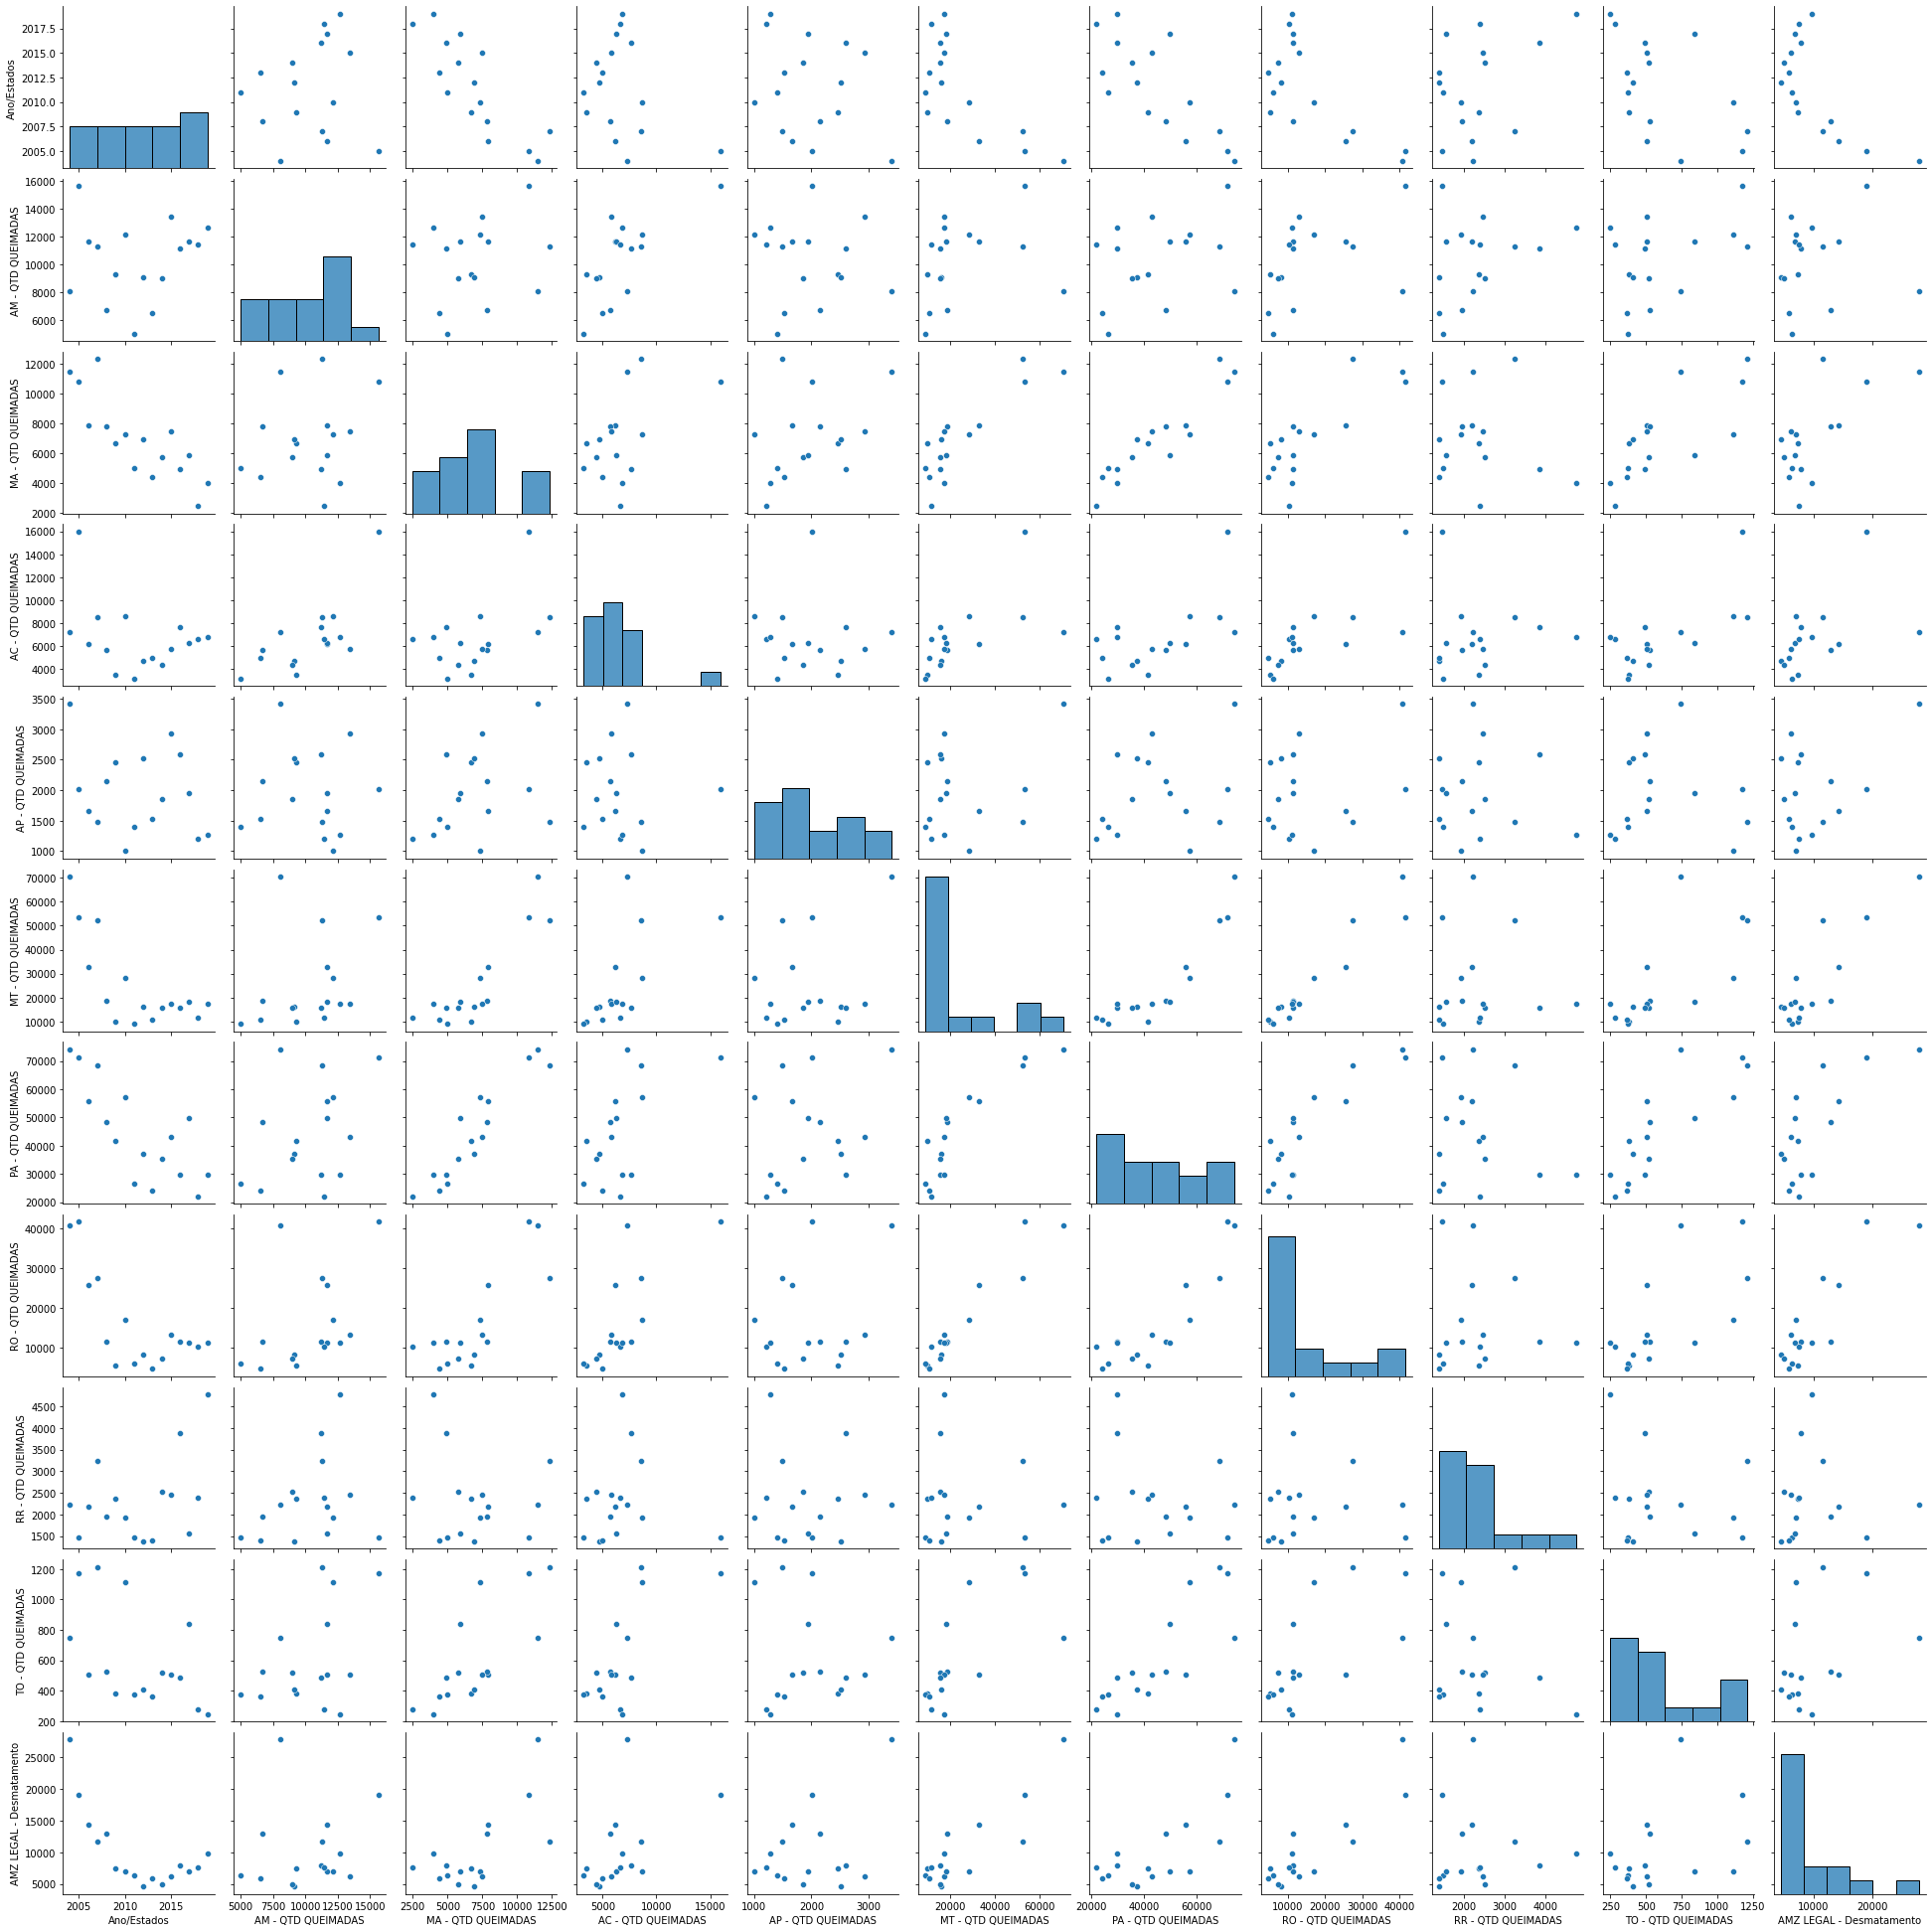

In [9]:
sns.pairplot(dados_treinos)

In [10]:
#Verificar a correlação entre as variáveis
print(dados_treinos.corr())

                          Ano/Estados  AM - QTD QUEIMADAS  MA - QTD QUEIMADAS  \
Ano/Estados                  1.000000            0.114212           -0.826526   
AM - QTD QUEIMADAS           0.114212            1.000000            0.199779   
MA - QTD QUEIMADAS          -0.826526            0.199779            1.000000   
AC - QTD QUEIMADAS          -0.330755            0.703970            0.500289   
AP - QTD QUEIMADAS          -0.253232           -0.055288            0.382619   
MT - QTD QUEIMADAS          -0.710003            0.286525            0.870156   
PA - QTD QUEIMADAS          -0.774456            0.351256            0.935372   
RO - QTD QUEIMADAS          -0.691468            0.428800            0.809020   
RR - QTD QUEIMADAS           0.382493            0.309313           -0.139544   
TO - QTD QUEIMADAS          -0.520570            0.434803            0.754098   
AMZ LEGAL - Desmatamento    -0.685284            0.112758            0.681215   

                          A

In [ ]:
#treinos_cols = ['Ano/Estados','AM - QTD QUEIMADAS']
#treinos_dados = dados_treinos[treinos_cols].values
#treinos_target = dados_treinos['AM - QTD QUEIMADAS'].values
#X , y = StandardScaler(treinos_dados),treinos_target
#X = treinos_dados
#y = treinos_target

In [11]:
#features    
x_train = dados_treinos.drop(['Ano/Estados','AM - QTD QUEIMADAS'],axis=1)
#variáveis resposta
y_train = dados_treinos['AM - QTD QUEIMADAS'].copy()

In [12]:
x_train.shape

(16, 9)

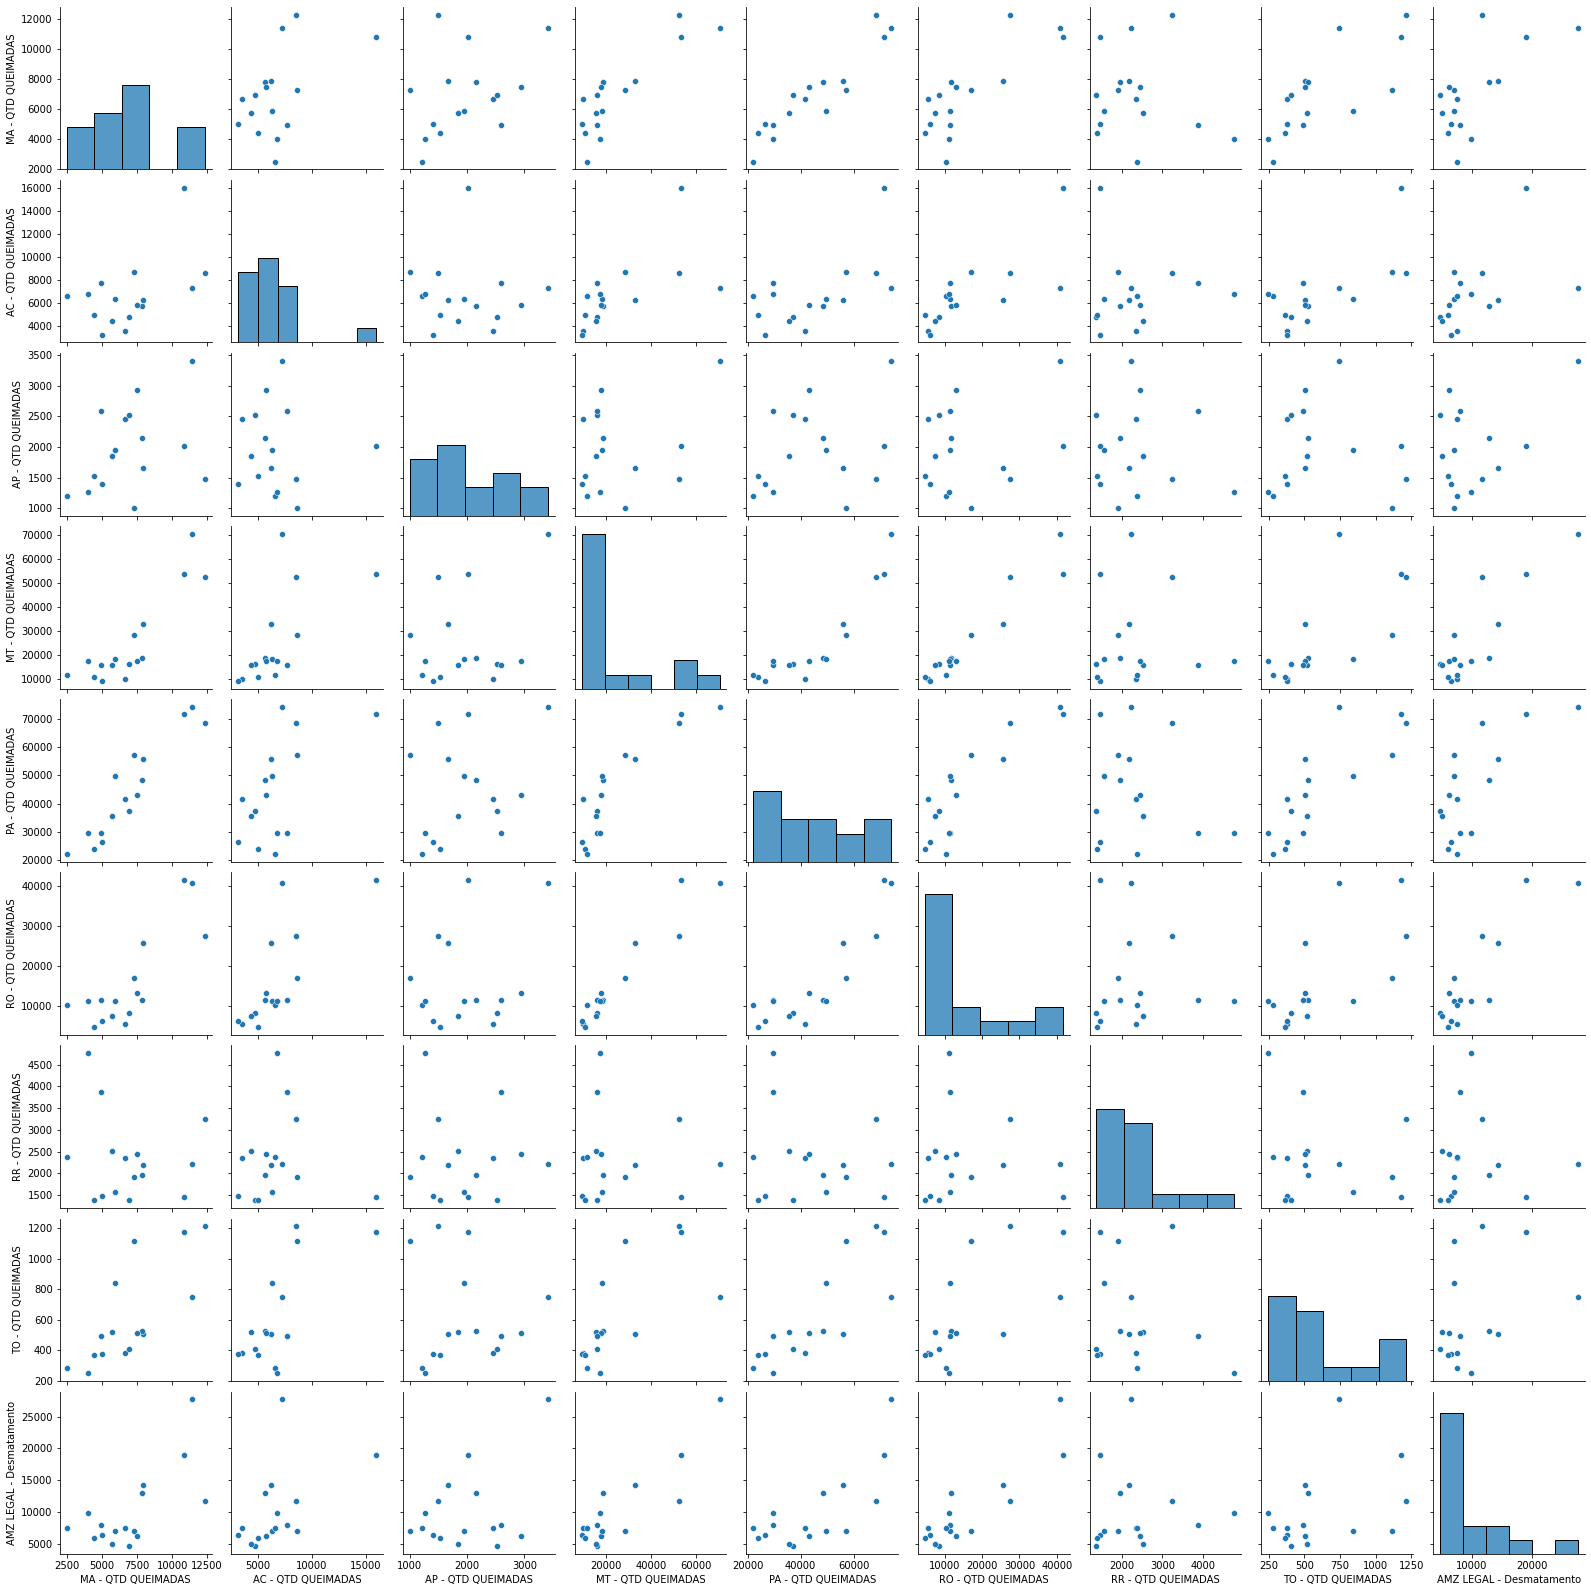

In [20]:
sns.pairplot(x_train)

In [14]:
#y= y.reshape(-1,1)
y_train.shape

(16,)

In [ ]:
#treinos_target

In [15]:
x_train

,MA - QTD QUEIMADAS,AC - QTD QUEIMADAS,AP - QTD QUEIMADAS,MT - QTD QUEIMADAS,PA - QTD QUEIMADAS,RO - QTD QUEIMADAS,RR - QTD QUEIMADAS,TO - QTD QUEIMADAS,AMZ LEGAL - Desmatamento
0,11443.0,7271.0,3413.0,70422.0,74214.0,40824.0,2221.0,746.0,27772.0
1,10820.0,15993.0,2020.0,53489.0,71477.0,41641.0,1461.0,1175.0,19014.0
2,7885.0,6198.0,1665.0,32745.0,55840.0,25699.0,2189.0,504.0,14286.0
3,12329.0,8549.0,1484.0,52399.0,68491.0,27477.0,3244.0,1214.0,11651.0
4,7822.0,5699.0,2153.0,18602.0,48449.0,11549.0,1950.0,528.0,12911.0
5,6664.0,3511.0,2456.0,9970.0,41664.0,5396.0,2359.0,382.0,7464.0
6,7298.0,8661.0,1000.0,28362.0,57196.0,16924.0,1918.0,1116.0,7000.0
7,4976.0,3191.0,1396.0,9103.0,26563.0,6078.0,1475.0,376.0,6418.0
8,6919.0,4720.0,2518.0,16133.0,37221.0,8312.0,1376.0,406.0,4571.0
9,4418.0,4980.0,1529.0,10830.0,24046.0,4613.0,1395.0,365.0,5891.0


In [16]:
y_train

0      8083.0
1     15644.0
2     11697.0
3     11293.0
4      6701.0
5      9280.0
6     12139.0
7      5028.0
8      9114.0
9      6512.0
10     9008.0
11    13419.0
12    11173.0
13    11685.0
14    11446.0
15    12665.0
Name: AM - QTD QUEIMADAS, dtype: float64

In [ ]:
#treinos_dados

In [17]:
#Criar o modelo
lin_reg = LinearRegression(normalize = True)
lin_reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [18]:
#Ver o score
print(lin_reg.score(x_train,y_train))

0.9627897741137342


In [ ]:
#dados_treinos.isnull()

In [ ]:
#dados_treinos.isna()

In [ ]:
#Tamanho da base de dados
#dados_treinos.shape

In [ ]:
#features    
#x_train = dados_treinos.drop(['Ano/Estados','AM - QTD QUEIMADAS'],axis=1)
#variáveis resposta
#y_train = dados_treinos['AM - QTD QUEIMADAS'].copy()

In [ ]:
#x_train.tail()

In [ ]:
#y_train

In [ ]:
#Dividi em subconjunto para testes
#X_train, X_test, y_train, y_test = train_test_split(x_train,y_train)

In [ ]:
#Descrever o Modelo e Treinar
#regr = MLPRegressor(hidden_layer_sizes=(15,), max_iter=5000).fit(X_train, y_train)

In [ ]:
#predição
#pred = regr.predict(x_train)

In [ ]:
#pred

In [ ]:
#Determina a precisão do modelo.    
#regr.score(X_test, y_test)